# WeatherPy - World Weather Analysis
Produced by Verna Orsatti
June 25,2018
Final Version

# Analysis


The 4 data generated graphs for this assignment are: 
    * Temperature (F) against Latitude 
    * Humidity (%) against Latitude 
    * Cloudiness(%) against Latitude 
    * Wind Speed (mph) against Latitude

Trends:

Taking into consideration the time of year that the data for this report is collected, there will be a shift in values as the year changes through its seasons.  This report was generated at a instant in time where the days are longest in the northern hemisphere, and shortest in the southern hemisphere. Temperatures would be expected to be higher in the norther hemisphere at this time of year in the month of June. 

Upon viewing the  Temperature Plot, the graph is more uniform in a bell curve across the ranges of latitudes.  Given the time of year this was generated,  one would logically think that as in December/January the curve should slant down to the right, and in June/July the curve should slant down to the left.  However, it doesn't.  If data were to be collected over a year or more, and then averaged, a trend could be seen to see if this were just a day with overall outlier temperatures that were unusual, or if there are other factors, such as global warming in the southern hemisphere.  Questions to ask would be as an example, how the atmosphere ozone layer is improving or deteriorating that might affect such results as this. A historical analysis of data could show such relationships.

For the Humidity Plot, the values for cities reported are likely to be affected by location to water. General world daily weather patterns also come in to play. Less randomly generated location points are found in latitudes where water dominates than in latitudes with more land mass.  The proportion of land to water is much higher in the northern hemisphere as reported by Wikipedia as being close to 80% land to 20% water. Locations shown in those latitudes with larger land masses are likely to be reporting dryer conditions, such as those inland locations with deserts. This chart is not as likely to be affected by the seasons except for the atmosphere’s ability to hold water in cold temperatures vs warm temperatures.

Cloudiness is also subject to atmospheric weather patterns for the day. For today's date there seems to be show more numerous pattern of cloudy weather outside the lower equator belt. In comparison of this chart with the Example chart given for this assignment that was taken in January, that same break in cloudiness exists in both charts which might indicate that the weather patterns might be generally sunnier that region of latitudes.

With the Wind Speed chart, values are likely affected by season.  Although there is less data for the southernmost latitudes, there are some high outliers.  As referred to in the previous analysis, the Wind plot in the example given for December/January shows higher values in the upper end latitudes, which would be in winter months on that chart.  This is opposite to values shown for this chart of June.  

Of course, land and water formations, along with current weather patterns will all affect these charts on any given day, and a true analysis would be better viewed over the averages over a larger time period.

Supplemental information and input:

For the production of the results, the manner in which the data is generated leaves room for interpretation.  A better representation of points on the included figures for locations of data collected would be to create bins for latitude range, and randomly select citiy data to fill those bins as equally as possible to eliminate the quantity factor of the number of cities in a latitude range that can affect the perceived result.  With a bin method of collecting data , analyzing vertical columns of data over the x axis of latitudes on the graphs are likely to show clearer trends. 

Also, to randomly select from known cities from an aggregate database would eliminate false connections between randomly created coordinates and locations of cities - a problem in this method that chooses a city based on coordinates that may fall anywhere on water or on land that may not be in a reasonably close are to the city provided by enclosed data method.  Openweathermap does provide a data file of over 200,000 cities in which a randome list could be created per latitude range.

For this assigment, the method required to use was utilizing the randomly selected coordinates to find a city nearby through citipy.  Data from those cities was then collected through OpenWeatherMaps, and plotted into 4 graphs of selected data, plotted against latitude values in a scatterplot.


# Main Code & Table of Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import datetime
import time

#Report Date
now = datetime.datetime.now()
today = now.strftime("%m/%d/%Y")

# Import API key
#import api_keys.py
api_key = "your code here"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create figures using seaborn and matplotlib
sns.set()

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Generate Cities list from numpy random & citypy
lat_lngs = []
cities = []
duplicate_cities= []
coords = [] #using this as an added column to show random citipy coords 
lats = []
lngs = []
countries = []
no_dup_lats = []
no_dup_lngs = []

# Size the random sample here 
size = 1500

# Create a set of random lat and lng combinations = 15 to start
print("Preparing random set of coordinates and nearest city from citipy...")

lats = np.random.uniform(low=-90.000, high=90.000, size=size)
lngs = np.random.uniform(low=-180.000, high=180.000, size=size)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
        
    if city not in cities:        
        cities.append(city) # list of unique random cities - all
        coords.append(lat_lng) # list of each city's coordinates - all
        countries.append(country)
        no_dup_lats.append(lat_lng[0])
        no_dup_lngs.append(lat_lng[1])
    else:
        #print("Duplicate city found, skipping: ", country,". City ", city," ",lat_lng)
        duplicate_cities.append(city)
        
# Print the city count to confirm sufficient count
print()
print(f"Out of {size} randomly selected cities, there were {len(duplicate_cities)} duplicates.") 
# print(f"These duplicate cities are excluded from the results: {duplicate_cities}") # Option to print duplicated cities

Preparing random set of coordinates and nearest city from citipy...

Out of 1500 randomly selected cities, there were 869 duplicates.


In [3]:
# Create dataframe for values
# Columna in example show they are alphabetized
columns = ["City","coords","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
cities_df = pd.DataFrame(columns=columns)

# Fill with data from Citipy
cities_df['City'] = cities # Citipy cities 
cities_df['coords'] = coords # Added colomn for random generated coords from citipy 
cities_df['Country'] = countries # Citipy country code
cities_df['Lat'] = no_dup_lats # format later with openweathermap's actual lat lon per city
cities_df['Lng'] = no_dup_lngs # format later with openweathermap's actual lat lon per city

## Perform API Calls

In [5]:
# API options from openweathermap.org
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

for index, row in cities_df.iterrows():   
    try:
        #data from citipy
        df_city = row['City']
        df_country = row['Country']
        
        # Get city/country data from openweather
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + df_city +"," + df_country
        response = requests.get(query_url).json()
        
        print(f"Processing city record {index} | ",df_city,", ",df_country)
        print(query_url)
        
        # Openweathermaps allows 60 calls per minute on free plan
        time.sleep(1) 
        
        # Get weather data 
        df_cloud = response["clouds"]["all"]
        df_date = response["dt"]
        df_humidity = response["main"]["humidity"]
        df_maxtemp = response["main"]["temp_max"]
        df_wind = response["wind"]["speed"]
        
        # Replace actual formatted coords per city  from openweathermaps
        df_lat = "{:0.2f}".format(response["coord"]["lat"]) 
        df_lng = "{:0.2f}".format(response["coord"]["lon"])
        
        # Add to dataframe - new way for future use
        cities_df.at[index,"Cloudiness"] = df_cloud
        cities_df.at[index,"Date"] = df_date
        cities_df.at[index,"Humidity"] = df_humidity
        cities_df.at[index,"Lat"] = df_lat
        cities_df.at[index,"Lng"] = df_lng
        cities_df.at[index, "Max Temp"] = df_maxtemp
        cities_df.at[index, "Wind Speed"] = df_wind
                
    except:
        print(f"Invalid city/country, {df_city} / {df_country}, skipping... ")
               

Processing city record 0 |  hobart ,  au
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=hobart,au
Processing city record 1 |  cidreira ,  br
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=cidreira,br
Processing city record 2 |  arona ,  es
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=arona,es
Processing city record 3 |  tuktoyaktuk ,  ca
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=tuktoyaktuk,ca
Processing city record 4 |  kruisfontein ,  za
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kruisfontein,za
Processing city record 5 |  punta arenas ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=punta arenas,cl
Processing city record 6 |  tessalit ,  

Processing city record 50 |  khorixas ,  na
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=khorixas,na
Processing city record 51 |  kapaa ,  us
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kapaa,us
Processing city record 52 |  bolonchen ,  mx
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=bolonchen,mx
Invalid city/country, bolonchen / mx, skipping... 
Processing city record 53 |  puerto ayora ,  ec
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=puerto ayora,ec
Processing city record 54 |  krasnyy luch ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=krasnyy luch,ru
Processing city record 55 |  qaqortoq ,  gl
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperi

Invalid city/country, ayan / ru, skipping... 
Processing city record 100 |  beringovskiy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=beringovskiy,ru
Processing city record 101 |  hasaki ,  jp
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=hasaki,jp
Processing city record 102 |  padang ,  id
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=padang,id
Processing city record 103 |  marcona ,  pe
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=marcona,pe
Invalid city/country, marcona / pe, skipping... 
Processing city record 104 |  lensk ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=lensk,ru
Processing city record 105 |  kavieng ,  pg
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd2

Processing city record 149 |  chokurdakh ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=chokurdakh,ru
Processing city record 150 |  hovd ,  mn
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=hovd,mn
Processing city record 151 |  puerto escondido ,  mx
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=puerto escondido,mx
Processing city record 152 |  ahipara ,  nz
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=ahipara,nz
Processing city record 153 |  northam ,  au
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=northam,au
Processing city record 154 |  sao filipe ,  cv
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=sao filipe,cv
Processing city record 155 |

Invalid city/country, nizhneyansk / ru, skipping... 
Processing city record 199 |  marsa matruh ,  eg
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=marsa matruh,eg
Processing city record 200 |  henties bay ,  na
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=henties bay,na
Processing city record 201 |  codrington ,  ag
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=codrington,ag
Invalid city/country, codrington / ag, skipping... 
Processing city record 202 |  kupang ,  id
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kupang,id
Processing city record 203 |  portland ,  au
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=portland,au
Processing city record 204 |  kalmunai ,  lk
http://api.openweathermap.org/data/2

Invalid city/country, barentsburg / sj, skipping... 
Processing city record 248 |  tanabe ,  jp
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=tanabe,jp
Processing city record 249 |  egvekinot ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=egvekinot,ru
Processing city record 250 |  rungata ,  ki
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=rungata,ki
Invalid city/country, rungata / ki, skipping... 
Processing city record 251 |  toliary ,  mg
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=toliary,mg
Invalid city/country, toliary / mg, skipping... 
Processing city record 252 |  pevek ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=pevek,ru
Processing city record 253 |  heihe ,  cn
http://api.openweat

Invalid city/country, villa oliva / py, skipping... 
Processing city record 296 |  kurara ,  in
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kurara,in
Processing city record 297 |  iquique ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=iquique,cl
Processing city record 298 |  nikolskoye ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=nikolskoye,ru
Processing city record 299 |  kysyl-syr ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kysyl-syr,ru
Processing city record 300 |  fairbanks ,  us
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=fairbanks,us
Processing city record 301 |  yumen ,  cn
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=

Processing city record 345 |  olutanga ,  ph
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=olutanga,ph
Processing city record 346 |  andevoranto ,  mg
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=andevoranto,mg
Invalid city/country, andevoranto / mg, skipping... 
Processing city record 347 |  berbera ,  so
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=berbera,so
Processing city record 348 |  taoudenni ,  ml
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=taoudenni,ml
Processing city record 349 |  sao miguel do araguaia ,  br
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=sao miguel do araguaia,br
Processing city record 350 |  nemuro ,  jp
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29

Processing city record 394 |  panguipulli ,  cl
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=panguipulli,cl
Processing city record 395 |  axim ,  gh
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=axim,gh
Processing city record 396 |  bronnoysund ,  no
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=bronnoysund,no
Processing city record 397 |  juruti ,  br
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=juruti,br
Processing city record 398 |  umm kaddadah ,  sd
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=umm kaddadah,sd
Processing city record 399 |  bayji ,  iq
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=bayji,iq
Processing city record 400 |  anchorag

Processing city record 445 |  sur ,  om
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=sur,om
Processing city record 446 |  cap malheureux ,  mu
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=cap malheureux,mu
Processing city record 447 |  strezhevoy ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=strezhevoy,ru
Processing city record 448 |  uwayl ,  sd
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=uwayl,sd
Invalid city/country, uwayl / sd, skipping... 
Processing city record 449 |  sanandaj ,  ir
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=sanandaj,ir
Processing city record 450 |  aktash ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=aktash,

Processing city record 494 |  grand-santi ,  gf
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=grand-santi,gf
Processing city record 495 |  massakory ,  td
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=massakory,td
Processing city record 496 |  guerrero negro ,  mx
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=guerrero negro,mx
Processing city record 497 |  ossora ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=ossora,ru
Processing city record 498 |  kamskoye ustye ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=kamskoye ustye,ru
Processing city record 499 |  pokhara ,  np
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=pokhara,np
Processing cit

Processing city record 544 |  karkaralinsk ,  kz
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=karkaralinsk,kz
Invalid city/country, karkaralinsk / kz, skipping... 
Processing city record 545 |  knysna ,  za
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=knysna,za
Processing city record 546 |  omsukchan ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=omsukchan,ru
Processing city record 547 |  lampang ,  th
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=lampang,th
Processing city record 548 |  dargaville ,  nz
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=dargaville,nz
Processing city record 549 |  belle fourche ,  us
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&un

Invalid city/country, marzuq / ly, skipping... 
Processing city record 593 |  dinsor ,  so
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=dinsor,so
Invalid city/country, dinsor / so, skipping... 
Processing city record 594 |  parabel ,  ru
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=parabel,ru
Processing city record 595 |  lumeje ,  ao
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=lumeje,ao
Processing city record 596 |  phangnga ,  th
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=phangnga,th
Processing city record 597 |  orchard homes ,  us
http://api.openweathermap.org/data/2.5/weather?appid=e7417750fa93ecd29eee7734eae3d649&units=imperial&q=orchard homes,us
Processing city record 598 |  yerofey pavlovich ,  ru
http://api.openweathermap.org/data/2.5/weather?app

In [6]:
# Remove dataframe rows with NaN
cities_df = cities_df.dropna()

In [7]:
cities_df.head()

,City,coords,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,"(-63.90826153679879, 139.9386413210645)",20,au,1529946000,87,-42.88,147.33,42.8,10.29
1,cidreira,"(-33.9175312577325, -48.23309965154235)",92,br,1529947870,100,-30.17,-50.22,56.37,11.77
2,arona,"(27.561958740989354, -16.64054321279741)",20,es,1529946000,69,28.10,-16.68,75.2,16.11
3,tuktoyaktuk,"(89.2141991524411, -128.13850662600913)",75,ca,1529946000,70,69.44,-133.03,46.4,2.24
4,kruisfontein,"(-42.76150899105838, 24.69177759461661)",48,za,1529947873,100,-34.00,24.73,58.17,5.06


In [8]:
# Verify sampling is at least 500
# if less than 500, increase the variable 'size = 1500' in line 13 to a larger number
cities_df.shape

(546, 10)

In [9]:
# Create csv file for dataframe
cities_df.to_csv(output_data_file) 

# Temperature vs Latitude Plot

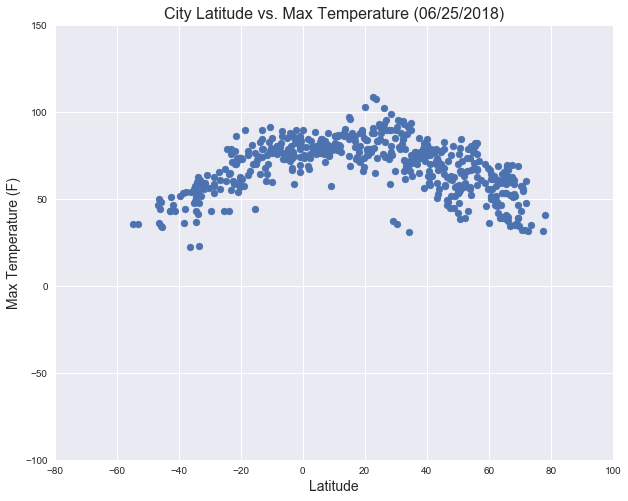

In [11]:
# Latitude vs. Temperature Plot
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=14)
title = "City Latitude vs. Max Temperature ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Max Temp"]))

plt.savefig("Temp_Lat.png")
plt.show()

# Humidity vs Latitude Plot

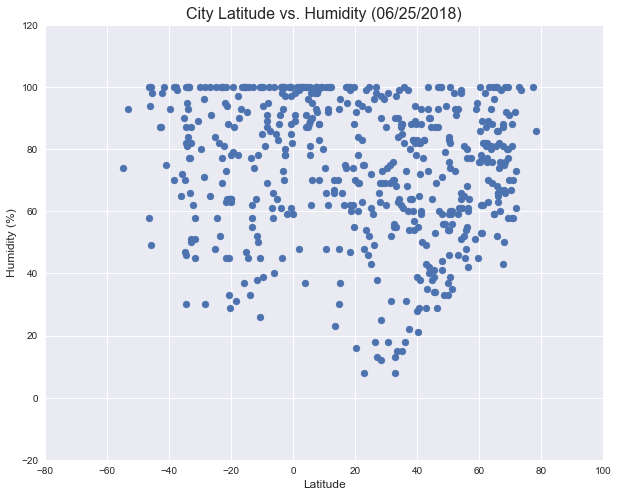

In [12]:
# Latitude vs. Humidity Plot
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
title = "City Latitude vs. Humidity ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Humidity"]))

plt.savefig("Humidity_Lat.png")
plt.show()

# Cloudiness vs Latitude Plot

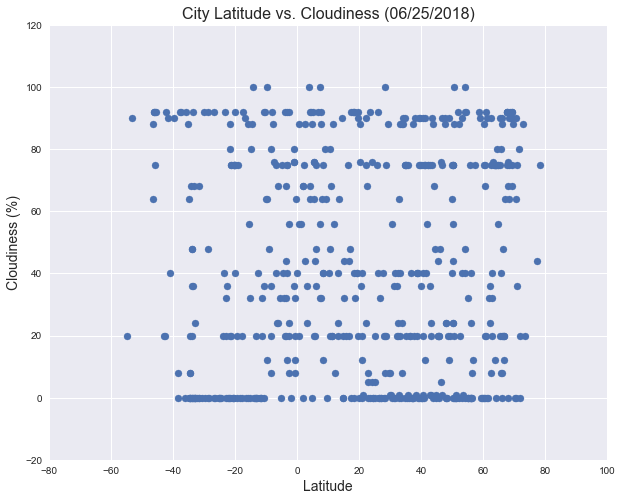

In [13]:
# Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
title = "City Latitude vs. Cloudiness ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Cloudiness"]))

plt.savefig("Cloud_Lat.png")
plt.show()

# Wind Speed vs Latitude Plot

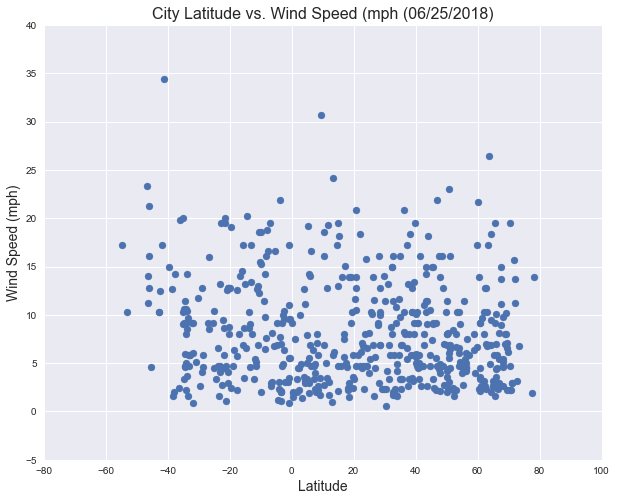

In [14]:
# Latitude vs. Wind Speed Plot
plt.figure(figsize=(10,8))
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
title = "City Latitude vs. Wind Speed (mph ({})".format(today)
plt.title(title, fontsize=16)
plt.scatter(pd.to_numeric(cities_df["Lat"]), pd.to_numeric(cities_df["Wind Speed"]))

plt.savefig("Wind_Lat.png")
plt.show()

In [ ]:
# Truth is only as good as how far you look, and the truth that matters is the present where we exist.
#    ~ Verna Orsatti June 24, 2018